## 1. Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

## 2. Load the Dataset

In [3]:
ecg_abnormal_dataframe = pd.read_csv("../input/heartbeat/ptbdb_abnormal.csv", header=None)
ecg_normal_dataframe = pd.read_csv("../input/heartbeat/ptbdb_normal.csv", header=None)

In [4]:
# Concat two dataframe
ecg_total_dataframe = pd.concat([ecg_normal_dataframe, ecg_abnormal_dataframe])
ecg_total_dataframe.columns = ecg_total_dataframe.columns.astype("str")
ecg_total_dataframe["187"] = ecg_total_dataframe["187"].astype("int64")
ecg_total_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 3. Exploratory data analysis

In [5]:
ecg_total_dataframe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 10505
Data columns (total 188 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    0       14552 non-null  float64
 1    1       14552 non-null  float64
 2    2       14552 non-null  float64
 3    3       14552 non-null  float64
 4    4       14552 non-null  float64
 5    5       14552 non-null  float64
 6    6       14552 non-null  float64
 7    7       14552 non-null  float64
 8    8       14552 non-null  float64
 9    9       14552 non-null  float64
 10   10      14552 non-null  float64
 11   11      14552 non-null  float64
 12   12      14552 non-null  float64
 13   13      14552 non-null  float64
 14   14      14552 non-null  float64
 15   15      14552 non-null  float64
 16   16      14552 non-null  float64
 17   17      14552 non-null  float64
 18   18      14552 non-null  float64
 19   19      14552 non-null  float64
 20   20      14552 non-null  float64
 21   21      14

In [6]:
ecg_total_dataframe.shape

(14552, 188)

In [7]:
ecg_total_dataframe["187"].value_counts().sort_index()

0     4046
1    10506
Name: 187, dtype: int64

In [8]:
# ecg_total_dataframe.describe()

## 4. Preprocessing data

In [9]:
labels = {0: "Normal", 1: "Myocardial Infarction"}
print(labels)

{0: 'Normal', 1: 'Myocardial Infarction'}


In [10]:
print(list(labels.values()))

['Normal', 'Myocardial Infarction']


In [11]:
# Train test split
X = ecg_total_dataframe.loc[:, ecg_total_dataframe.columns != "187"].to_numpy()
y = ecg_total_dataframe.loc[:, "187"].to_numpy()
# print(X.shape)
# print(y.shape)

In [12]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape[0] / X_test.shape[0]) #  train/test ratio

(11641, 187)
(2911, 187)
(11641,)
(2911,)
3.9989694263139817


In [14]:
train_unique, train_counts = np.unique(y_train, return_counts=True)
print(train_unique)
print(train_counts)
print(train_counts[1]/train_counts[0]) # abnormal/normal ration

[0 1]
[3237 8404]
2.596231078158789


In [15]:
test_unique, test_counts = np.unique(y_test, return_counts=True)
print(test_unique)
print(test_counts)
print(test_counts[1]/test_counts[0]) # abnormal/normal ratio

[0 1]
[ 809 2102]
2.5982694684796046


## Define models: ANN, 1D CNN, 1D VGG, 1D ResNet, 1D InceptionNet

In [16]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, Dropout, Flatten, MaxPooling1D, AveragePooling1D, ReLU, Softmax, GlobalAveragePooling1D, Add
# from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.regularizers import L2
from keras.utils.vis_utils import plot_model

### ANN model

In [17]:
def create_simple_ANN_model():
    input_layer = Input(shape = (187))
    
    dense_1 = Dense(64, activation=ReLU(), kernel_regularizer = L2()) (input_layer)
    dense_2 = Dense(32, activation=ReLU(), kernel_regularizer = L2()) (dense_1)
    output_layer = Dense(1, activation="sigmoid", kernel_regularizer = L2()) (dense_2)
    
    return Model(inputs=input_layer, outputs=output_layer)

simple_ann_model = create_simple_ANN_model()
simple_ann_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                12032     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 14,145
Trainable params: 14,145
Non-trainable params: 0
_________________________________________________________________


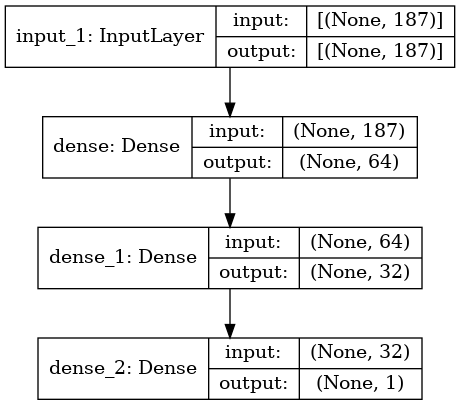

In [18]:
plot_model(simple_ann_model, show_shapes=True, show_layer_names=True)

In [19]:
simple_ANN_model = create_simple_ANN_model()
simple_ANN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])
simple_ANN_history = simple_ANN_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
12/12 [==============================] - 2s 55ms/step - loss: 1.8943 - binary_accuracy: 0.7206 - auc: 0.6253 - val_loss: 1.7483 - val_binary_accuracy: 0.7221 - val_auc: 0.6918
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 1.6417 - binary_accuracy: 0.7220 - auc: 0.7393 - val_loss: 1.5257 - val_binary_accuracy: 0.7224 - val_auc: 0.7656
Epoch 3/10
12/12 [==============================] - 0s 11ms/step - loss: 1.4335 - binary_accuracy: 0.7274 - auc: 0.7914 - val_loss: 1.3397 - val_binary_accuracy: 0.7317 - val_auc: 0.7840
Epoch 4/10
12/12 [==============================] - 0s 11ms/step - loss: 1.2599 - binary_accuracy: 0.7438 - auc: 0.8095 - val_loss: 1.1836 - val_binary_accuracy: 0.7643 - val_auc: 0.8040
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 1.1148 - binary_accuracy: 0.7621 - auc: 0.8273 - val_loss: 1.0545 - val_binary_accuracy: 0.7815 - val_auc: 0.8214
Epoch 6/10
12/12 [==============================] - 0s 10ms/step 

In [20]:
print(simple_ANN_history.history["loss"])
print(simple_ANN_history.history["binary_accuracy"])
print(simple_ANN_history.history["auc"])
print(simple_ANN_history.history["val_loss"])
print(simple_ANN_history.history["val_binary_accuracy"])
print(simple_ANN_history.history["val_auc"])


[1.8943328857421875, 1.6417326927185059, 1.4335405826568604, 1.259899377822876, 1.114754319190979, 0.9960924983024597, 0.8997879028320312, 0.8213154673576355, 0.7592403292655945, 0.7080102562904358]
[0.7205566763877869, 0.7220169901847839, 0.7274289131164551, 0.7437505125999451, 0.7621338367462158, 0.7813761830329895, 0.7908255457878113, 0.7944334745407104, 0.7954643368721008, 0.7977836728096008]
[0.6252881288528442, 0.7392665147781372, 0.791388750076294, 0.8095055818557739, 0.8272817730903625, 0.8395873308181763, 0.846987247467041, 0.8540933132171631, 0.8564921617507935, 0.8597409725189209]
[1.7482706308364868, 1.525713562965393, 1.3397258520126343, 1.1835949420928955, 1.054483413696289, 0.9493728280067444, 0.8640123009681702, 0.7950133085250854, 0.7405416965484619, 0.694912850856781]
[0.722088634967804, 0.7224321365356445, 0.7317073345184326, 0.7643421292304993, 0.7815183997154236, 0.7890759110450745, 0.7897629737854004, 0.7883888483047485, 0.7952593564987183, 0.7945722937583923]
[0.

In [21]:
simple_ANN_model.save('simple_ANN_model')

### Simple CNN model

In [22]:
def create_simple_CNN_model():
    input_layer = Input(shape = (187,1))
    
    conv_1 = Conv1D(filters=32, kernel_size = 3, strides = 1, padding="same") (input_layer)
    relu_1 = ReLU() (conv_1)
    maxpool_1 = MaxPooling1D(pool_size=2, strides=None, padding='valid') (relu_1)
    
    flatten = Flatten() (maxpool_1)
    dense_1 = Dense(64, activation=ReLU(), kernel_regularizer = L2()) (flatten)
    output_layer = Dense(1, activation="sigmoid", kernel_regularizer = L2()) (dense_1)    
    return Model(inputs=input_layer, outputs=output_layer)

simple_cnn_model = create_simple_CNN_model()
simple_cnn_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 32)           128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 187, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 93, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2976)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                190528    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65  

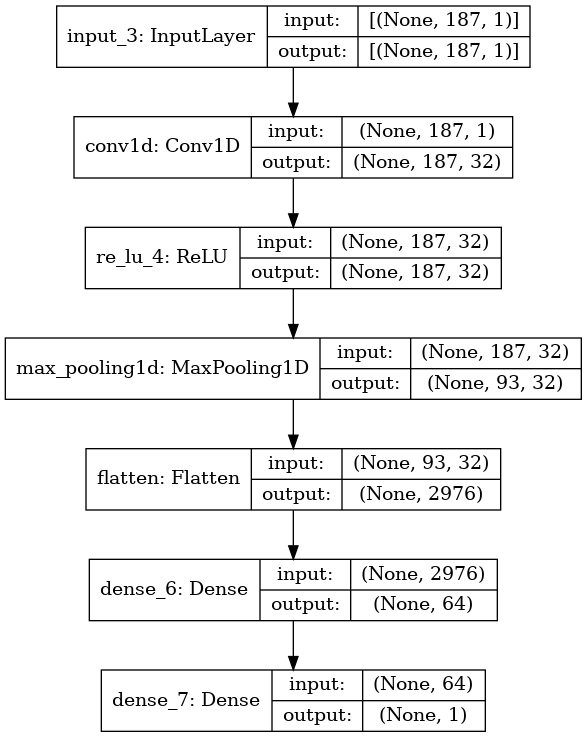

In [23]:
plot_model(simple_cnn_model, show_shapes=True, show_layer_names=True)

In [24]:
simple_CNN_model = create_simple_CNN_model()
simple_CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])
simple_CNN_history = simple_CNN_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
12/12 [==============================] - 2s 97ms/step - loss: 1.5305 - binary_accuracy: 0.7097 - auc_1: 0.6097 - val_loss: 1.1475 - val_binary_accuracy: 0.7221 - val_auc_1: 0.7173
Epoch 2/10
12/12 [==============================] - 1s 53ms/step - loss: 0.9555 - binary_accuracy: 0.7239 - auc_1: 0.7531 - val_loss: 0.7768 - val_binary_accuracy: 0.7286 - val_auc_1: 0.7581
Epoch 3/10
12/12 [==============================] - 1s 52ms/step - loss: 0.6823 - binary_accuracy: 0.7531 - auc_1: 0.7909 - val_loss: 0.6098 - val_binary_accuracy: 0.7623 - val_auc_1: 0.7945
Epoch 4/10
12/12 [==============================] - 1s 50ms/step - loss: 0.5660 - binary_accuracy: 0.7703 - auc_1: 0.8219 - val_loss: 0.5429 - val_binary_accuracy: 0.7709 - val_auc_1: 0.8196
Epoch 5/10
12/12 [==============================] - 1s 54ms/step - loss: 0.5188 - binary_accuracy: 0.7815 - auc_1: 0.8403 - val_loss: 0.5141 - val_binary_accuracy: 0.7801 - val_auc_1: 0.8338
Epoch 6/10
12/12 [===========================

In [25]:
simple_CNN_model.save('simple_CNN_model')

### VGG-16 model

In [26]:
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155
def create_vgg16_model():
    # input  
    input_layer = Input(shape =(187,1))
    
    # 1st Conv Block
    x = Conv1D (filters =64, kernel_size =3, padding ='same', activation='relu')(input_layer)
    x = Conv1D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPooling1D(pool_size =2, strides =2, padding ='same')(x)
    
    # 2nd Conv Block
    x = Conv1D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv1D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPooling1D(pool_size =2, strides =2, padding ='same')(x)
    
    # 3rd Conv block  
    x = Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = Conv1D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
    x = MaxPooling1D(pool_size =2, strides =2, padding ='same')(x)
    
    # 4th Conv block
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPooling1D(pool_size =2, strides =2, padding ='same')(x)

    # 5th Conv block
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv1D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPooling1D(pool_size =2, strides =2, padding ='same')(x)
    
    # Fully connected layers  
    x = Flatten()(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    x = Dense(units = 4096, activation ='relu')(x) 
    output_layer = Dense(units = 1, activation ='softmax')(x)
    
    return Model(inputs=input_layer, outputs=output_layer)


vgg16_model = create_vgg16_model()
vgg16_model.summary()    

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 187, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 94, 128)           24704     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 128)           49280     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 47, 128)           0   

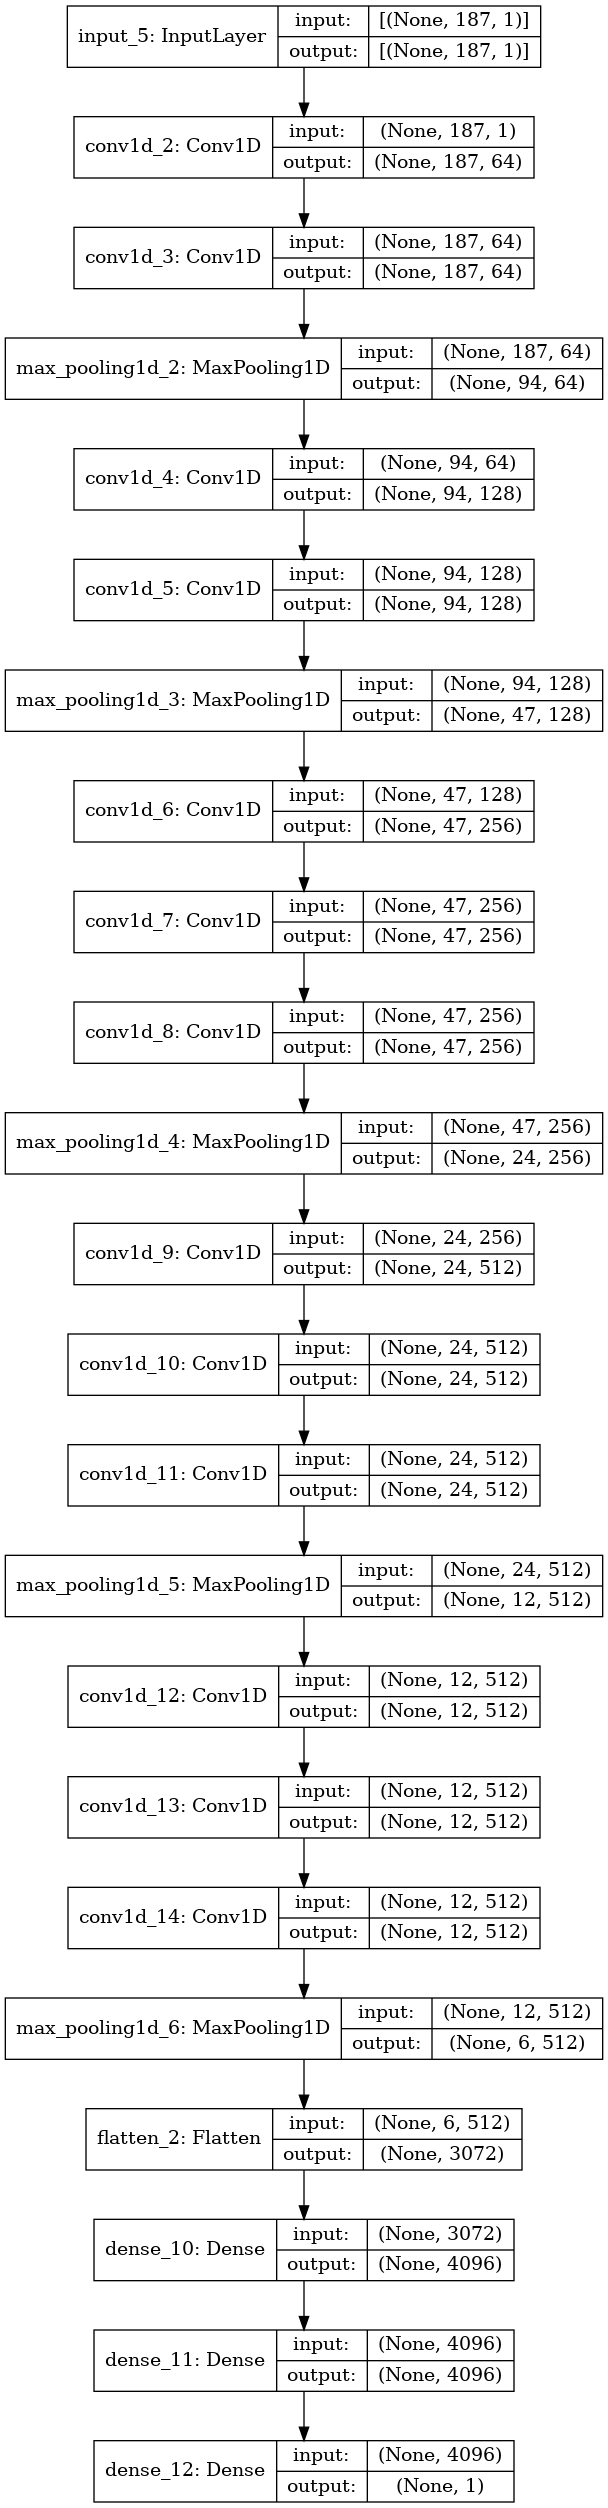

In [27]:
plot_model(vgg16_model, show_shapes=True, show_layer_names=True)

In [28]:
vgg16_model = create_vgg16_model()
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])
vgg16_history = vgg16_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
12/12 [==============================] - 119s 10s/step - loss: 0.7497 - binary_accuracy: 0.7219 - auc_2: 0.5000 - val_loss: 0.5910 - val_binary_accuracy: 0.7221 - val_auc_2: 0.5000
Epoch 2/10
12/12 [==============================] - 116s 10s/step - loss: 0.5959 - binary_accuracy: 0.7219 - auc_2: 0.5000 - val_loss: 0.5925 - val_binary_accuracy: 0.7221 - val_auc_2: 0.5000
Epoch 3/10
12/12 [==============================] - 115s 10s/step - loss: 0.5919 - binary_accuracy: 0.7219 - auc_2: 0.5000 - val_loss: 0.5911 - val_binary_accuracy: 0.7221 - val_auc_2: 0.5000
Epoch 4/10
12/12 [==============================] - 116s 10s/step - loss: 0.5915 - binary_accuracy: 0.7219 - auc_2: 0.5000 - val_loss: 0.5911 - val_binary_accuracy: 0.7221 - val_auc_2: 0.5000
Epoch 5/10
12/12 [==============================] - 116s 10s/step - loss: 0.5913 - binary_accuracy: 0.7219 - auc_2: 0.5000 - val_loss: 0.5910 - val_binary_accuracy: 0.7221 - val_auc_2: 0.5000
Epoch 6/10
12/12 [======================

### Resnet-18 model

In [29]:
# n_obs, feature, depth = x_train.shape
# batch_size = 512

In [30]:
# https://www.kaggle.com/code/songrise/implementing-resnet-18-using-keras/notebook
# https://www.kaggle.com/code/aryarishabh/ecg-heartbeat-categorization-resnet#Resnet-model

def residual_block(X, num_filter, kernel_size, down_sample=False):
    
    X_shortcut = X
    
    if down_sample == False:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    else:
        X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=2, padding='same')(X) 
        X_shortcut = Conv1D(filters=num_filter, kernel_size=1, strides=2, padding='same')(X_shortcut)
        X_shortcut = BatchNormalization(axis=2)(X_shortcut)

    X = BatchNormalization(axis=2)(X)
    X = ReLU()(X)
    
    X = Conv1D(filters=num_filter, kernel_size=kernel_size, strides=1, padding='same')(X)
    X = BatchNormalization(axis=2)(X)
    
    X = Add()([X, X_shortcut]) 
    X = ReLU()(X)
    
    return X

In [31]:
def create_resnet18_model():
    input_layer = Input(shape =(187,1))
    # Conv1
    x = Conv1D(filters=64, kernel_size=7, strides=2, padding='same')(input_layer)
    # Conv2_x
    x = MaxPooling1D(pool_size =3, strides =2, padding ='same')(x)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    x = residual_block(x, num_filter=64, kernel_size=3, down_sample=False)
    # Conv3_x
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=128, kernel_size=3, down_sample=False)
    # Conv4_x
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=256, kernel_size=3, down_sample=False)
    # Conv5_x
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=True)
    x = residual_block(x, num_filter=512, kernel_size=3, down_sample=False)
    # Classifier
    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(1, activation="sigmoid")(x)
    return Model(inputs=input_layer, outputs=output_layer)
    
resnet18_model = create_resnet18_model()
resnet18_model.summary()    

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_28 (Conv1D)              (None, 94, 64)       512         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_12 (MaxPooling1D) (None, 47, 64)       0           conv1d_28[0][0]                  
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 47, 64)       12352       max_pooling1d_12[0][0]           
____________________________________________________________________________________________

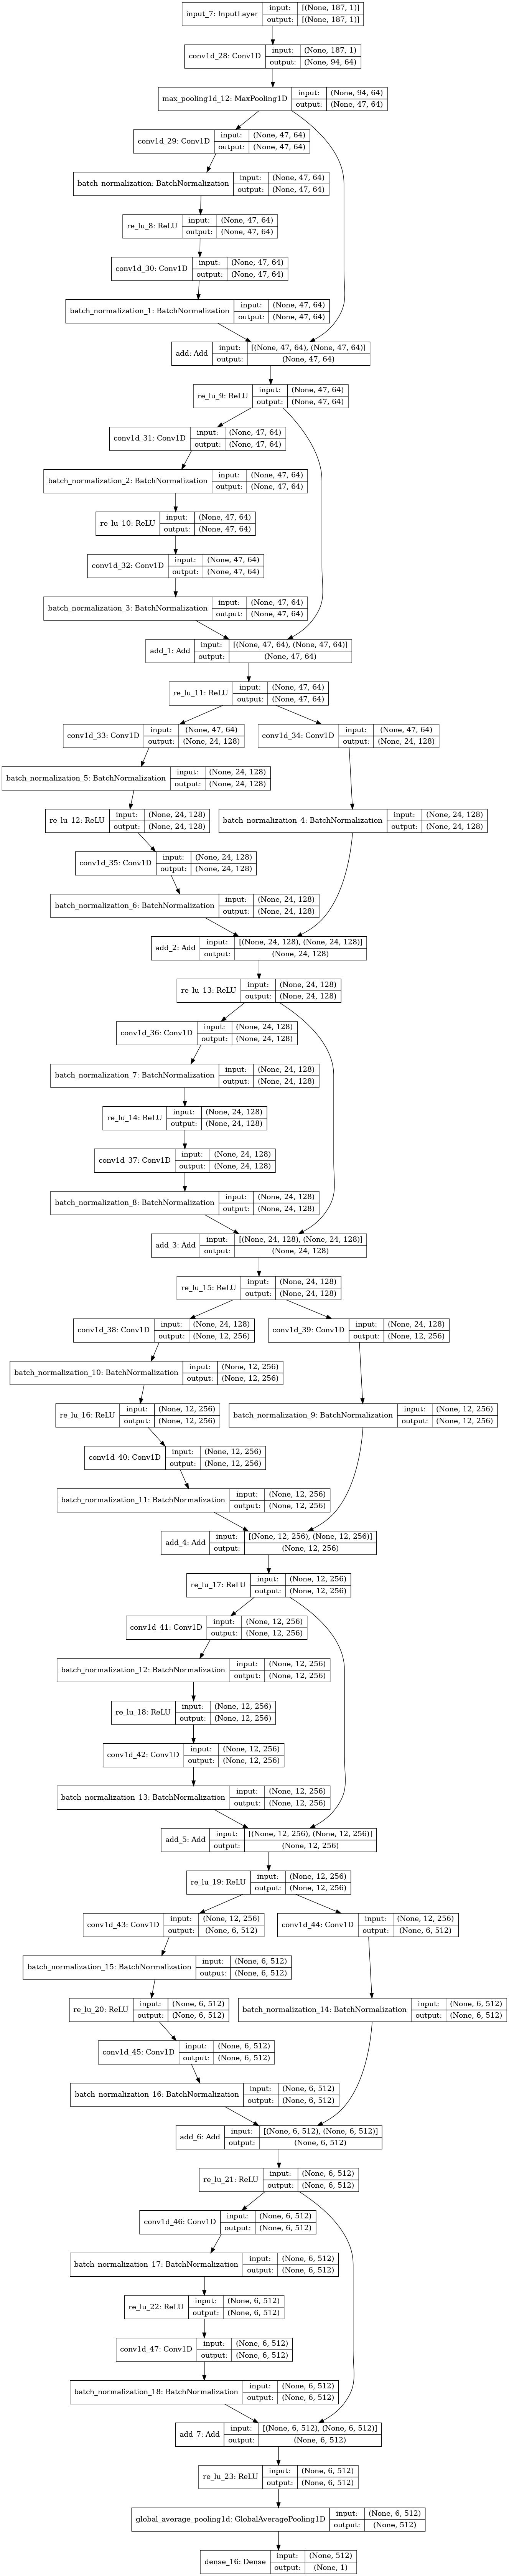

In [32]:
plot_model(resnet18_model, show_shapes=True, show_layer_names=True)

In [33]:
resnet18_model = create_resnet18_model()
resnet18_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])
resnet18_history = resnet18_model.fit(x=X_train, y=y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
12/12 [==============================] - 50s 3s/step - loss: 0.4818 - binary_accuracy: 0.7947 - auc_3: 0.8368 - val_loss: 0.5998 - val_binary_accuracy: 0.7221 - val_auc_3: 0.6453
Epoch 2/10
12/12 [==============================] - 40s 3s/step - loss: 0.1337 - binary_accuracy: 0.9455 - auc_3: 0.9859 - val_loss: 0.5999 - val_binary_accuracy: 0.7221 - val_auc_3: 0.5082
Epoch 3/10
12/12 [==============================] - 40s 3s/step - loss: 0.0499 - binary_accuracy: 0.9815 - auc_3: 0.9977 - val_loss: 0.5973 - val_binary_accuracy: 0.7221 - val_auc_3: 0.4575
Epoch 4/10
12/12 [==============================] - 40s 3s/step - loss: 0.0211 - binary_accuracy: 0.9937 - auc_3: 0.9991 - val_loss: 0.6302 - val_binary_accuracy: 0.7221 - val_auc_3: 0.4251
Epoch 5/10
12/12 [==============================] - 40s 3s/step - loss: 0.0124 - binary_accuracy: 0.9965 - auc_3: 0.9997 - val_loss: 0.7459 - val_binary_accuracy: 0.7221 - val_auc_3: 0.4091
Epoch 6/10
12/12 [==============================] 

In [34]:
resnet18_model.save("resnet18")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# InceptionNet

https://nitishkumarpilla.medium.com/understand-googlenet-inception-v1-and-implement-it-easily-from-scratch-using-tensorflow-and-keras-5404239f361

https://towardsdatascience.com/beyond-the-standard-cnn-in-tensorflow-2-a7562d25ca2d

https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

In [35]:
def inception_module(x,filters_1x1,filters_3x3_reduce,filters_3x3, filters_5x5_reduce,filters_5x5,filters_pool_proj):
    # branch 1x1
    conv_1x1 = Conv1D(filters_1x1, kernel_size=1, padding="same", activation="relu")(x)
    # branch 3x3
    conv_3x3 = Conv1D(filters_3x3_reduce, kernel_size=1, padding="same", activation="relu")(x)
    conv_3x3 = Conv1D(filters_3x3, kernel_size=3, padding="same", activation="relu")(conv_3x3)
    # branch 5x5
    conv_5x5 = Conv1D(filters_5x5_reduce, kernel_size=1, padding="same", activation="relu")(x)
    conv_5x5 = Conv1D(filters_5x5, kernel_size=5, padding="same", activation="relu")(conv_5x5)
    # brance pool
    pool_proj = MaxPooling1D(pool_size = 3, strides=1, padding="same")(x)
    pool_proj = Conv1D(filters_pool_proj, kernel_size=1, padding="same", activation="relu")(pool_proj)
    # channel concat
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=2)

    return output

In [36]:
# tf.keras.layers.Lambda(tf.nn.local_response_normalization)

In [37]:
def create_inception_v1_model():
    # input 
    input_layer = Input(shape=(187, 1))
    x = Conv1D(filters= 64, kernel_size= 7, padding="same", strides=2, activation="relu")(input_layer)
    x = MaxPooling1D(pool_size = 3, padding="same", strides= 2)(x)
    x = Conv1D(filters= 64, kernel_size= 1, padding="same", strides=1, activation="relu")(x)
    x = Conv1D(filters=192, kernel_size= 3, padding="same", strides=1, activation="relu")(x)
    x = MaxPooling1D(pool_size = 3, padding="same", strides= 2)(x)
    
    # Inception module 3a
    x = inception_module(x,filters_1x1=64,filters_3x3_reduce=96,filters_3x3=128,filters_5x5_reduce=16,filters_5x5=32,filters_pool_proj=32)
    
    # Inception module 3b
    x = inception_module(x,filters_1x1=128,filters_3x3_reduce=128,filters_3x3=192,filters_5x5_reduce=32,filters_5x5=96,filters_pool_proj=64)
    
    # Max pool
    x = MaxPooling1D(pool_size = 3, padding="same", strides=2)(x)
    
    # Inception module 4a
    x = inception_module(x,filters_1x1=192,filters_3x3_reduce=96,filters_3x3=208,filters_5x5_reduce=16,filters_5x5=48,filters_pool_proj=64)
    
    # output 1
    x1 = AveragePooling1D(pool_size = 5, strides=3)(x)
    x1 = Conv1D(filters=128, kernel_size=1, padding="same", activation="relu")(x1)
    x1 = Flatten()(x1)
    x1 = Dense(1024, activation="relu")(x1)
    x1 = Dropout(0.7)(x1)
    x1 = Dense(1, activation='sigmoid')(x1)
    
    # Inception module 4b
    x = inception_module(x,filters_1x1=160,filters_3x3_reduce=112, filters_3x3=224,filters_5x5_reduce=24,filters_5x5=64,filters_pool_proj=64)
    
    # Inception module 4c
    x = inception_module(x,filters_1x1=128,filters_3x3_reduce=128, filters_3x3=256,filters_5x5_reduce=24,filters_5x5=64,filters_pool_proj=64)
    
    # Inception module 4d
    x = inception_module(x,filters_1x1=112,filters_3x3_reduce=144, filters_3x3=288,filters_5x5_reduce=32,filters_5x5=64,filters_pool_proj=64)
    
    # output 2
    x2 = AveragePooling1D(pool_size = 5, strides=3)(x)
    x2 = Conv1D(filters=128, kernel_size=1, padding="same", activation="relu")(x2)
    x2 = Flatten()(x2)
    x2 = Dense(1024, activation="relu")(x2)
    x2 = Dropout(0.7)(x2)
    x2 = Dense(1, activation='sigmoid')(x2)
    
    # Inception module 4e
    x = inception_module(x,filters_1x1=256,filters_3x3_reduce=160, filters_3x3=320,filters_5x5_reduce=32,filters_5x5=128, filters_pool_proj=128)
    
    # Max pool
    x = MaxPooling1D(pool_size = 3, padding="same", strides=2)(x)
    
    # Inception module 5a 
    x = inception_module(x,filters_1x1=256,filters_3x3_reduce=160, filters_3x3=320,filters_5x5_reduce=32,filters_5x5=128, filters_pool_proj=128)
    
    # Inception module 5b
    x = inception_module(x, filters_1x1=384,filters_3x3_reduce=192, filters_3x3=384,filters_5x5_reduce=48,filters_5x5=128, filters_pool_proj=128)
    
    # output 3
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.4)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=[x,x1,x2])
    return model

from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
inception_v1_model = create_inception_v1_model()
inception_v1_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_68 (Conv1D)              (None, 94, 64)       512         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_14 (MaxPooling1D) (None, 47, 64)       0           conv1d_68[0][0]                  
__________________________________________________________________________________________________
conv1d_69 (Conv1D)              (None, 47, 64)       4160        max_pooling1d_14[0][0]           
____________________________________________________________________________________________

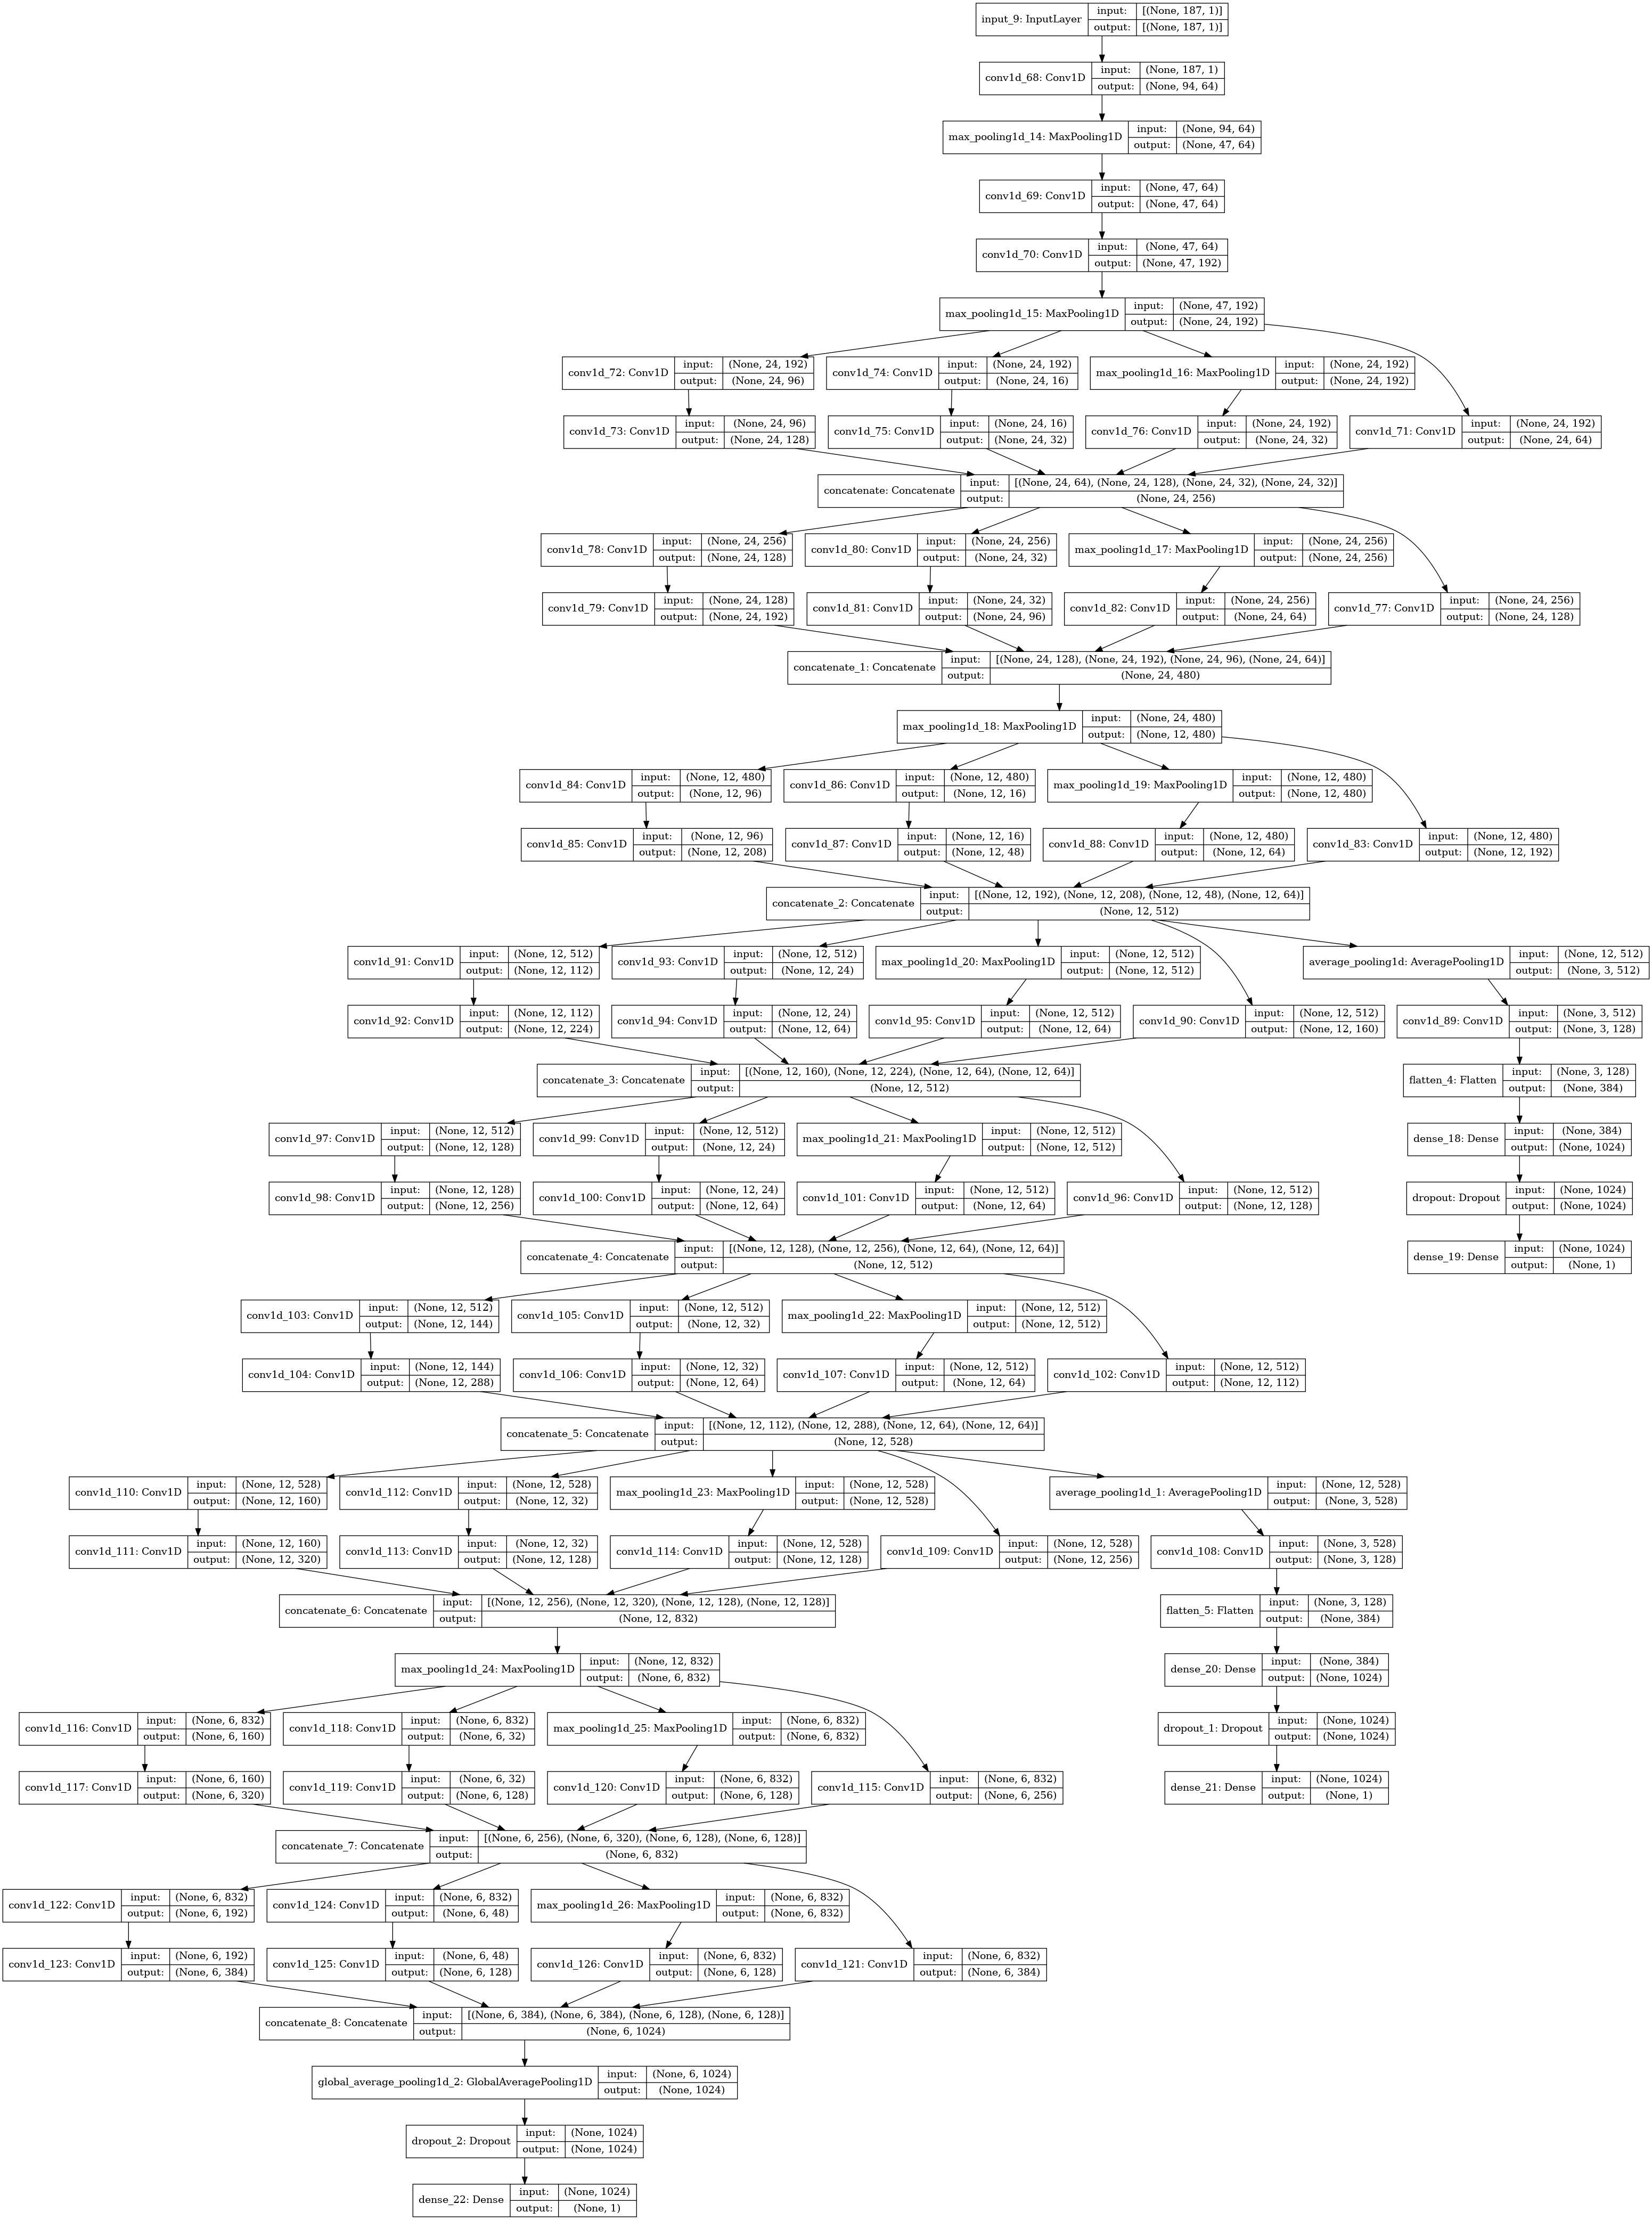

In [38]:
plot_model(inception_v1_model, show_shapes=True, show_layer_names=True)

Resample